In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
from collections import Counter 

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\zoo-g\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\zoo-g\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
data = pd.read_csv('Downloads\credit_scoring_eng.csv')

In [3]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [5]:
data.shape

(21525, 12)

In [6]:
data.isnull().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

count     19351.000000
mean      63046.497661
std      140827.311974
min      -18388.949901
25%       -2747.423625
50%       -1203.369529
75%        -291.095954
max      401755.400475
Name: days_employed, dtype: float64

<AxesSubplot:>

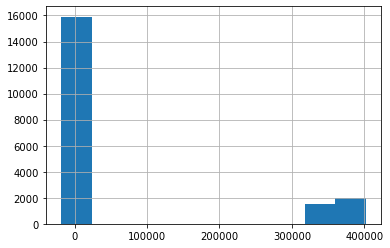

In [7]:
# Look at days_employed
display(data.days_employed.describe())
data.days_employed.hist()

<AxesSubplot:xlabel='dob_years', ylabel='days_employed'>

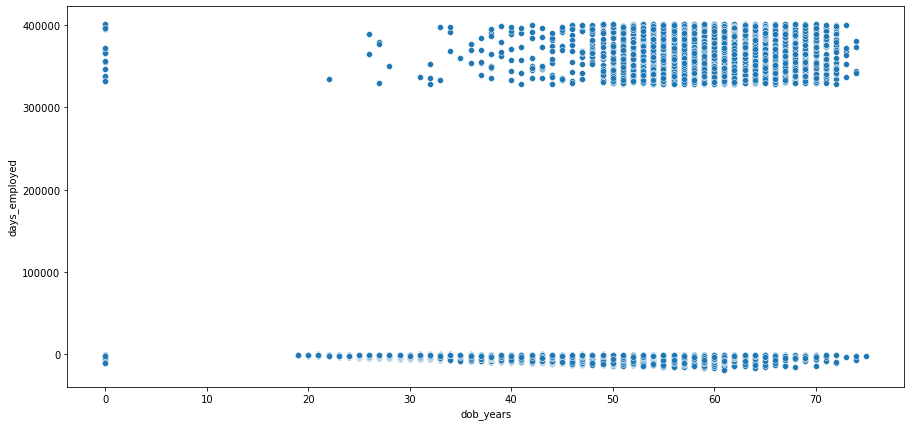

In [8]:
plt.figure(figsize=(15,7))
sns.scatterplot(y='days_employed', x='dob_years', data=data)

In [9]:
data_n = data.copy()

In [10]:
# let's replace negative values 
data_n.loc[data_n['days_employed'] < 0, 'days_employed'] = data_n['days_employed']*-1

In [11]:
data_n

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
21522,1,2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car


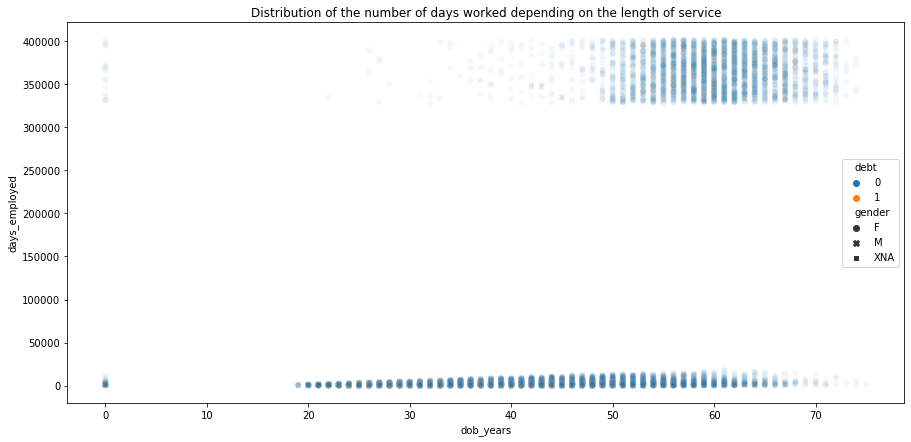

In [12]:
plt.figure(figsize=(15,7))
sns.scatterplot(y='days_employed', x='dob_years', hue='debt',
                data=data_n, alpha=0.05,
               style="gender")
plt.title('Distribution of the number of days worked depending on the length of service')
pass

we got 2 areas in one the number of days worked is less than 25,000, in the other more than 300,000 (which is implausible in itself)

<AxesSubplot:xlabel='days_employed'>

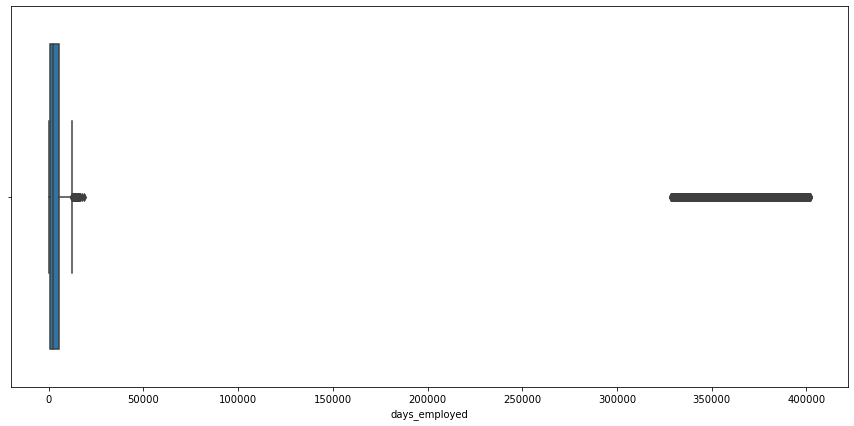

In [13]:
plt.figure(figsize=(15,7))
sns.boxplot(x='days_employed', data=data_n)
#plt.ylim(0,20000)

here it is also clear that the number of days worked is more than 300,000, this is an anomaly

<AxesSubplot:xlabel='dob_years', ylabel='days_employed'>

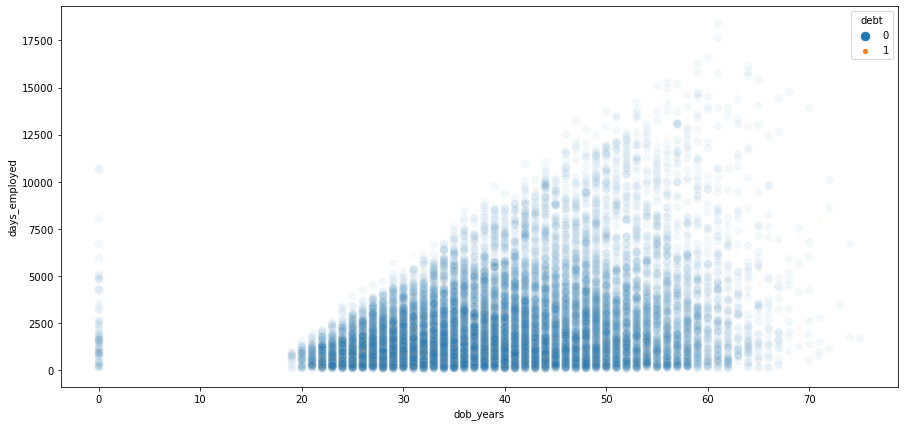

In [14]:
# Let's take look at clients who have worked up to 25,000 days
plt.figure(figsize=(15,7))
sns.scatterplot(y='days_employed', x='dob_years', data=data_n.query('days_employed <25000'), alpha=0.05,
               hue="debt", size="debt")

well, it is quite logical that the more age, the more days worked, so our replacement of negative values was generally correct

<AxesSubplot:xlabel='dob_years', ylabel='days_employed'>

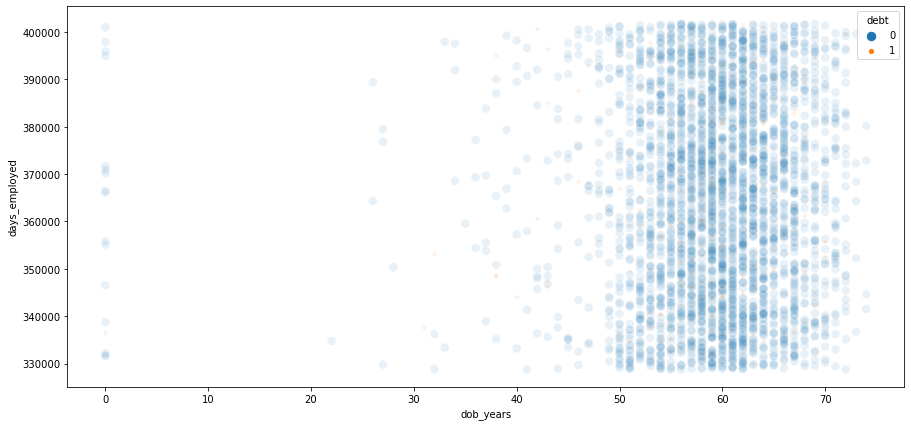

In [15]:
plt.figure(figsize=(15,7))
sns.scatterplot(y='days_employed', x='dob_years', data=data_n.query('days_employed >25000'), alpha=0.1,
               hue="debt", size="debt")

in the section where `days_employed` is more than 25000, such a dependence is not visible that it once again indicates data anomalous

In [16]:
# take a look at the data from dob_years
data_n.dob_years.describe()

count    21525.000000
mean        43.293380
std         12.574584
min          0.000000
25%         33.000000
50%         42.000000
75%         53.000000
max         75.000000
Name: dob_years, dtype: float64

<AxesSubplot:xlabel='dob_years'>

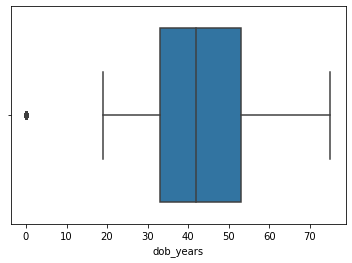

In [17]:
sns.boxplot(x='dob_years', data=data_n)

In [18]:
data_n.query('dob_years==0').groupby('income_type')['children'].count()


income_type
business         20
civil servant     6
employee         55
retiree          20
Name: children, dtype: int64

on the boxplot, it may seem that the value 0 is a throw-in, but we will not touch these zeros. Why?
this information may not have been requested

In [19]:
data_n.query('dob_years == 00')

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
99,0,346541.618895,0,Secondary Education,1,married,0,F,retiree,0,11406.644,car
149,0,2664.273168,0,secondary education,1,divorced,3,F,employee,0,11228.230,housing transactions
270,3,1872.663186,0,secondary education,1,married,0,F,employee,0,16346.633,housing renovation
578,0,397856.565013,0,secondary education,1,married,0,F,retiree,0,15619.310,construction of own property
1040,0,1158.029561,0,bachelor's degree,0,divorced,3,F,business,0,48639.062,to own a car
...,...,...,...,...,...,...,...,...,...,...,...,...
19829,0,NaN,0,secondary education,1,married,0,F,employee,0,NaN,housing
20462,0,338734.868540,0,secondary education,1,married,0,F,retiree,0,41471.027,purchase of my own house
20577,0,331741.271455,0,secondary education,1,unmarried,4,F,retiree,0,20766.202,property
21179,2,108.967042,0,bachelor's degree,0,married,0,M,business,0,38512.321,building a real estate


in fact, in further analysis, we can take into account the data from the `dob_years` attribute and, in fact, we don’t need `days_employed`

In [20]:
data_final=data_n.drop(columns='days_employed')

In [21]:
data_final

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...
21520,1,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21521,0,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
21522,1,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car


In [22]:
# Children
data_final.children.value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

most likely 20 children is 2 children, and -1 is 1

In [23]:
data_final.children=data_final.children.replace([-1,20],[1,2])

In [24]:
data_final.children.value_counts()

0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

In [25]:
data_final.education.value_counts()

secondary education    13750
bachelor's degree       4718
SECONDARY EDUCATION      772
Secondary Education      711
some college             668
BACHELOR'S DEGREE        274
Bachelor's Degree        268
primary education        250
Some College              47
SOME COLLEGE              29
PRIMARY EDUCATION         17
Primary Education         15
graduate degree            4
GRADUATE DEGREE            1
Graduate Degree            1
Name: education, dtype: int64

need to convert the data to lowercase

In [26]:
data_final.education = data_final.education.str.lower()

In [27]:
data_final.education.value_counts()

secondary education    15233
bachelor's degree       5260
some college             744
primary education        282
graduate degree            6
Name: education, dtype: int64

In [28]:
dict_education = pd.Series(data_final.education.values,index=data_final.education_id).to_dict()
dict_education

{0: "bachelor's degree",
 1: 'secondary education',
 2: 'some college',
 3: 'primary education',
 4: 'graduate degree'}

In [29]:
data_final.family_status.value_counts()

married              12380
civil partnership     4177
unmarried             2813
divorced              1195
widow / widower        960
Name: family_status, dtype: int64

In [30]:
dict_family_status = pd.Series(data_final.family_status.values,index=data_final.family_status_id).to_dict()
dict_family_status

{0: 'married',
 1: 'civil partnership',
 2: 'widow / widower',
 3: 'divorced',
 4: 'unmarried'}

In [31]:
data_final.head()

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


In [32]:
# purpose
data_final.purpose.value_counts()

wedding ceremony                            797
having a wedding                            777
to have a wedding                           774
real estate transactions                    676
buy commercial real estate                  664
buying property for renting out             653
housing transactions                        653
transactions with commercial real estate    651
purchase of the house                       647
housing                                     647
purchase of the house for my family         641
construction of own property                635
property                                    634
transactions with my real estate            630
building a real estate                      626
buy real estate                             624
building a property                         620
purchase of my own house                    620
housing renovation                          612
buy residential real estate                 607
buying my own car                       

In [33]:
# Let's lemmatize!
data_final['purpose'].value_counts()
purpose_unique = ' '.join(data_final['purpose'].unique()) 


wnl = WordNetLemmatizer()
lemma_purpose_unique = nltk.word_tokenize(purpose_unique)
#print(list2)


print(Counter(lemma_purpose_unique))

data_final['lemmas_purpose'] = data_final['purpose'].apply(nltk.word_tokenize)
data_final['lemmas_purpose']

def after_all(row):
    lemmas = row['lemmas_purpose']
    if 'car' in lemmas:
        return 'car'
    if 'cars' in lemmas:
        return 'car'#
    if 'housing' in lemmas:
        return 'property'
    if 'house' in lemmas:
        return 'property'
    if 'property' in lemmas:
        return 'property'
    if 'estate' in lemmas:
        return 'property'
    if 'education' in lemmas:
        return 'education'
    if 'university' in lemmas:
        return 'education'
    if 'educated' in lemmas:
        return 'education'
    return 'wedding'
data_final['purpose_of_loan'] = data_final.apply(after_all, axis=1)

Counter({'a': 9, 'car': 8, 'education': 7, 'real': 7, 'estate': 7, 'purchase': 6, 'to': 6, 'of': 5, 'transactions': 4, 'my': 4, 'buy': 4, 'own': 4, 'property': 4, 'house': 3, 'wedding': 3, 'housing': 3, 'buying': 3, 'the': 2, 'supplementary': 2, 'for': 2, 'commercial': 2, 'building': 2, 'second-hand': 2, 'with': 2, 'getting': 2, 'university': 2, 'have': 1, 'having': 1, 'family': 1, 'residential': 1, 'construction': 1, 'cars': 1, 'become': 1, 'educated': 1, 'an': 1, 'ceremony': 1, 'get': 1, 'higher': 1, 'profile': 1, 'renting': 1, 'out': 1, 'renovation': 1, 'going': 1})


In [34]:
data_final['purpose_of_loan'].value_counts()

property     10840
car           4315
education     4022
wedding       2348
Name: purpose_of_loan, dtype: int64

In [35]:
# Replace NaNs
data_final.total_income = data_final.groupby('income_type')['total_income'].apply(lambda x: x.fillna(x.median()))

In [36]:
# Convert into int
data_final.total_income = data_final.total_income.astype('int')

In [37]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21525 non-null  int64 
 1   dob_years         21525 non-null  int64 
 2   education         21525 non-null  object
 3   education_id      21525 non-null  int64 
 4   family_status     21525 non-null  object
 5   family_status_id  21525 non-null  int64 
 6   gender            21525 non-null  object
 7   income_type       21525 non-null  object
 8   debt              21525 non-null  int64 
 9   total_income      21525 non-null  int32 
 10  purpose           21525 non-null  object
 11  lemmas_purpose    21525 non-null  object
 12  purpose_of_loan   21525 non-null  object
dtypes: int32(1), int64(5), object(7)
memory usage: 2.1+ MB


E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


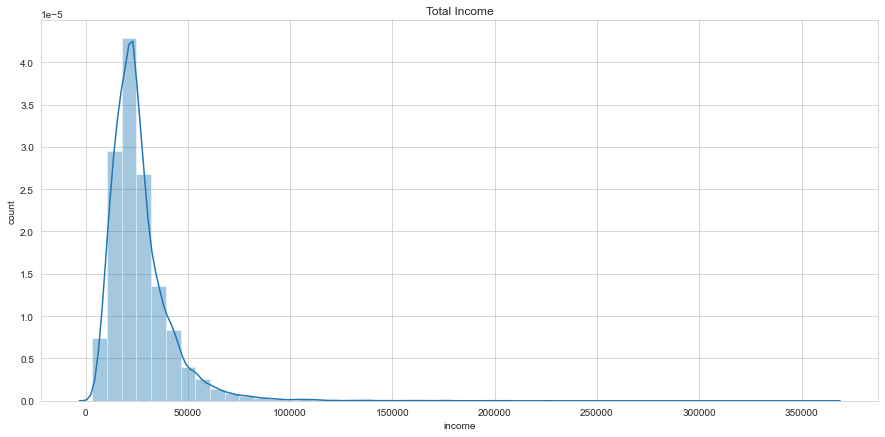

In [38]:
#total_income
plt.figure(figsize=(15,7))
sns.set_style('whitegrid')
sns.distplot(data_final.total_income, )
plt.title('Total Income')
plt.xlabel('income')
plt.ylabel('count')
pass

In [39]:
qwant = pd.qcut(data_final['total_income'],3, labels=False) # we divide the income into 3 parts using the qcut method
data_final['qwant'] = qwant 
def income_index(row):
    
    total_income = row['qwant']
    debt = row['debt']
    if total_income == 0:
        return 'low income'
    if total_income == 1:
        return 'average income'
    if total_income ==2 :
        return 'high income'
    
data_final['income_index'] = data_final.apply(income_index, axis=1) # create a category column

In [40]:
data_final

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,lemmas_purpose,purpose_of_loan,qwant,income_index
0,1,42,bachelor's degree,0,married,0,F,employee,0,40620,purchase of the house,"[purchase, of, the, house]",property,2,high income
1,1,36,secondary education,1,married,0,F,employee,0,17932,car purchase,"[car, purchase]",car,0,low income
2,0,33,secondary education,1,married,0,M,employee,0,23341,purchase of the house,"[purchase, of, the, house]",property,1,average income
3,3,32,secondary education,1,married,0,M,employee,0,42820,supplementary education,"[supplementary, education]",education,2,high income
4,0,53,secondary education,1,civil partnership,1,F,retiree,0,25378,to have a wedding,"[to, have, a, wedding]",wedding,1,average income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,43,secondary education,1,civil partnership,1,F,business,0,35966,housing transactions,"[housing, transactions]",property,2,high income
21521,0,67,secondary education,1,married,0,F,retiree,0,24959,purchase of a car,"[purchase, of, a, car]",car,1,average income
21522,1,38,secondary education,1,civil partnership,1,M,employee,1,14347,property,[property],property,0,low income
21523,3,38,secondary education,1,married,0,M,employee,1,39054,buying my own car,"[buying, my, own, car]",car,2,high income


In [41]:
# categorize the column Children
def children_index(row):
    
    children = row['children']
    
    if children == 0:
        return 'no children'
    if children == 1:
        return '1 child'
    if children == 2:
        return '2 children'
    if children >= 3:
        return '3 children and more'
    
    

data_final['index_children'] = data_final.apply(children_index, axis=1)

In [42]:
data_final.head()

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,lemmas_purpose,purpose_of_loan,qwant,income_index,index_children
0,1,42,bachelor's degree,0,married,0,F,employee,0,40620,purchase of the house,"[purchase, of, the, house]",property,2,high income,1 child
1,1,36,secondary education,1,married,0,F,employee,0,17932,car purchase,"[car, purchase]",car,0,low income,1 child
2,0,33,secondary education,1,married,0,M,employee,0,23341,purchase of the house,"[purchase, of, the, house]",property,1,average income,no children
3,3,32,secondary education,1,married,0,M,employee,0,42820,supplementary education,"[supplementary, education]",education,2,high income,3 children and more
4,0,53,secondary education,1,civil partnership,1,F,retiree,0,25378,to have a wedding,"[to, have, a, wedding]",wedding,1,average income,no children


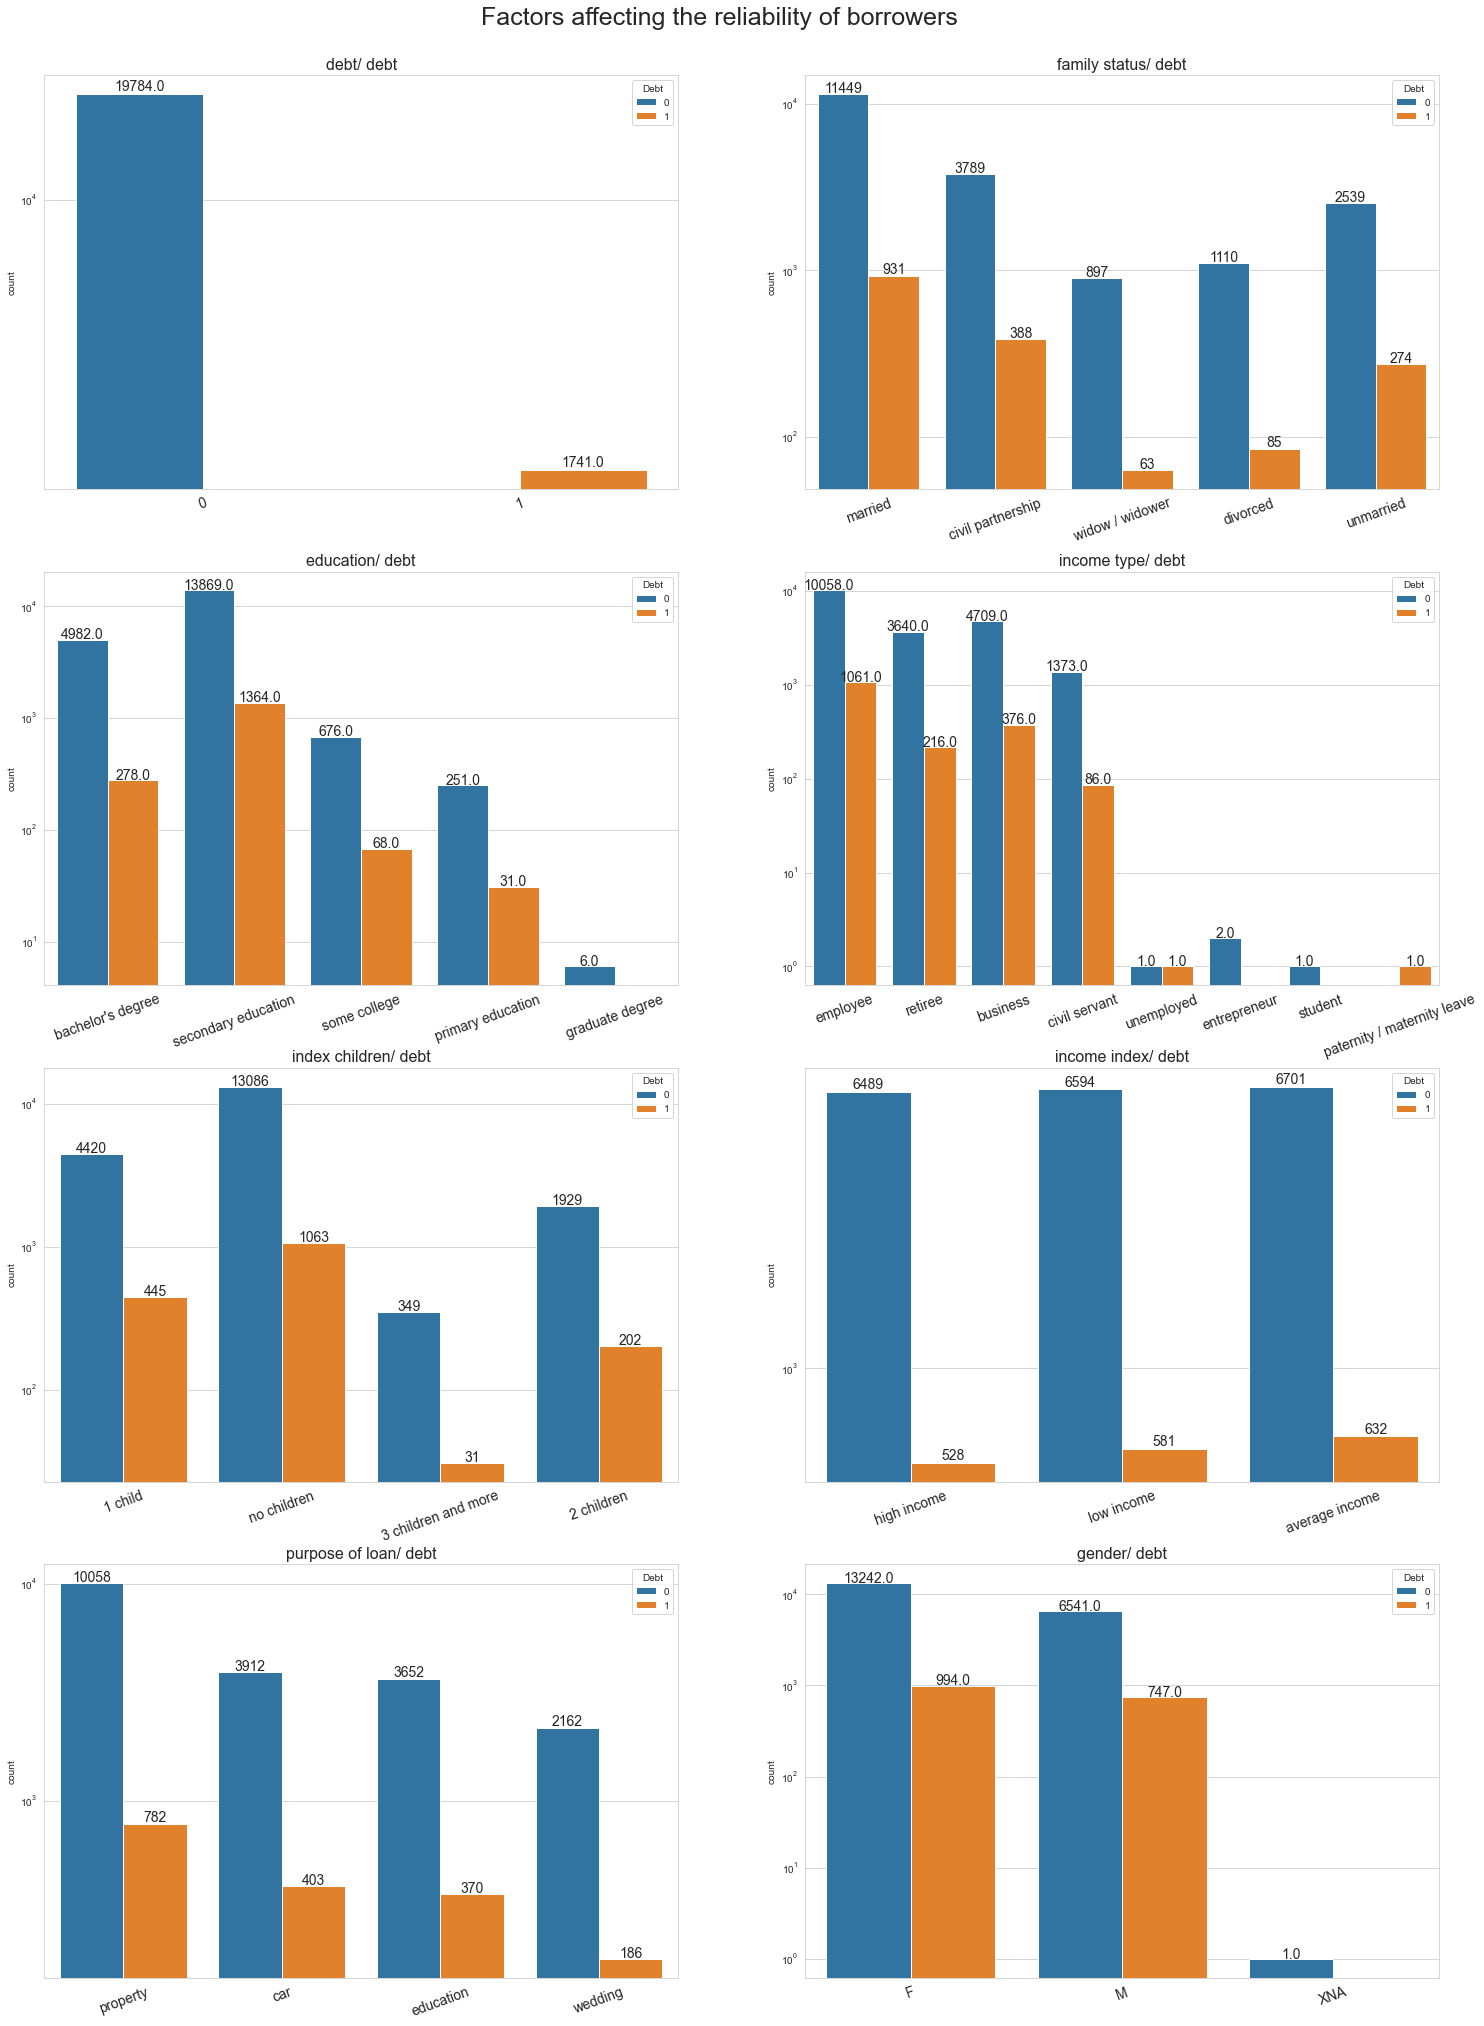

In [43]:
categorical_vars = ['debt','family_status', 'education',
                    'income_type','index_children',
                    'income_index', 'purpose_of_loan', 'gender']
fig,axs = plt.subplots(nrows=4, ncols=2,figsize=(25,35))
fig.suptitle('Factors affecting the reliability of borrowers', fontsize=25, va='baseline', y=0.9)



for i, var in enumerate(categorical_vars):
        row = i//2
        pos = i % 2
        ax = sns.countplot(x=var, hue='debt', data=data_final, ax=axs[row][pos])
        plt.sca(axs[row][pos])
        plt.legend(loc="upper right", title='Debt')
        plt.xticks(rotation=20, fontsize=14)
        plt.title(categorical_vars[i].replace('_', ' ')+'/ debt', fontsize=16)             
        ax.set(yscale='log',xlabel='')
        
        for p in ax.patches:
            width = p.get_width()
            height = p.get_height()
            x, y = p.get_xy() 
            ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center', fontsize=14)

1. About 90 percent of conscientious payers, and slightly less than 10 debtors
2. Family status:
    - Most often, loans are taken by family people.
    - In second place is civil partnership, and the percentage of debtors in this category is higher than in the previous one. Married 7%, civil partnership 9%
    - The situation is the same in the unmarried category, there are less debtors out of the total number than in the previous two, but if you look at the percentage within the group, then there are 9% of debtors in it.
    - The most conscientious categories are divorced and widowed
    
(such a numerical distribution within this group is quite understandable. Family people take loans more often and maybe they just get approved more often, they have more needs and perhaps more confidence since there is partner support)

3. Education:
    - Most often, people with secondary education take loans, and about 10% of them are debtors.
    - In second place are people with a bachelor's degree, among them there are already half as many debtors, about 5%
    - Some college and primary education together make up approximately 4% of the total number of borrowers, 10% of which are debtors
    - and the smallest but at the same time the most conscientious group is the graduate degree
    
4. Income Type:
    - Most of all we have an employee and, like in other groups, about 10% of them are unscrupulous payers
    - retiree, business, civil servant are less numerous and among them the civil servant has the least debtors (about 6%)
    - the rest of the groups are practically not represented, it is quite possible that these categories simply find it harder to get a loan
    
5. Index children:
    - People without children, and therefore without additional expenses, take loans more often, and return them well too. Debtors 7%
    - People with one and two children take a loan less often and there are already about 10% of debtors among them
    - Families with many children take loans less often than all of them, slightly more than 1.5% of the total, and 10% of them are debtors
    
6. Income index:
    - People with different income levels take loans with approximately the same frequency.
    - The most unreliable category here is people with an average income, again almost 10%
7. Purpose of loan:
    - It is logical that most of the loans are real estate loans, almost 50% of the total.
    - Loans for a car and education are taken with approximately the same frequency. However, people who take out a car loan pay it back the worst. Debtors approximately 12%
    - The rarest category is weddings, apparently people still rely on their strength to pay for the celebration
8. Gender:
    - Women take a loan more often, but they also pay it back better. 6% debtors
    - Among male debtors 10%

<AxesSubplot:xlabel='dob_years', ylabel='count'>

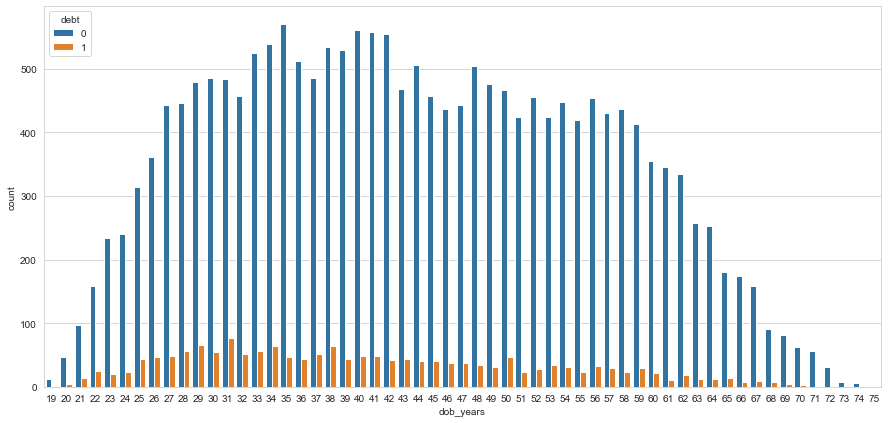

In [44]:
plt.figure(figsize=(15,7))
sns.countplot(x='dob_years',hue='debt', data=data_final.query('dob_years > 0'))

In [45]:
data_final.head()

,children,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,lemmas_purpose,purpose_of_loan,qwant,income_index,index_children
0,1,42,bachelor's degree,0,married,0,F,employee,0,40620,purchase of the house,"[purchase, of, the, house]",property,2,high income,1 child
1,1,36,secondary education,1,married,0,F,employee,0,17932,car purchase,"[car, purchase]",car,0,low income,1 child
2,0,33,secondary education,1,married,0,M,employee,0,23341,purchase of the house,"[purchase, of, the, house]",property,1,average income,no children
3,3,32,secondary education,1,married,0,M,employee,0,42820,supplementary education,"[supplementary, education]",education,2,high income,3 children and more
4,0,53,secondary education,1,civil partnership,1,F,retiree,0,25378,to have a wedding,"[to, have, a, wedding]",wedding,1,average income,no children


In [46]:
pd.pivot_table(data_final, values=['dob_years',
                    'family_status_id','total_income'], index=['gender','debt','income_type','family_status','education','purpose_of_loan','index_children'],
                   aggfunc={'dob_years':np.mean,'total_income':np.mean,'family_status_id':'count'})\
                    .reset_index().sort_values('family_status_id',ascending=False)\
                    .rename(columns={'family_status_id':'total_count'}).head(5)

,gender,debt,income_type,family_status,education,purpose_of_loan,index_children,dob_years,total_count,total_income
353,F,0,employee,married,secondary education,property,no children,44.734597,844,21789.422986
489,F,0,retiree,married,secondary education,property,no children,58.565485,649,20200.083205
1054,M,0,employee,married,secondary education,property,no children,43.944341,539,27530.918367
350,F,0,employee,married,secondary education,property,1 child,38.300813,369,21366.452575
282,F,0,employee,civil partnership,secondary education,wedding,no children,43.870091,331,22168.540785


What does a client look like who takes a loan most often and repays on time.
This is a woman, married, Employee without children, average 44 years old with an average income of about 22,000, who took out a loan for real estate

In [47]:
pd.pivot_table(data_final, values=['dob_years',
                    'family_status_id','total_income'], index=['gender','debt','income_type','family_status','education','purpose_of_loan','index_children'],
                   aggfunc={'dob_years':np.mean,'total_income':np.mean,'family_status_id':'count'})\
                    .reset_index().sort_values('family_status_id',ascending=False)\
                    .rename(columns={'family_status_id':'total_count'})\
                    .query('debt==1').head(5)

,gender,debt,income_type,family_status,education,purpose_of_loan,index_children,dob_years,total_count,total_income
1288,M,1,employee,married,secondary education,property,no children,39.968750,64,27240.218750
698,F,1,employee,married,secondary education,property,no children,41.333333,63,20978.714286
1285,M,1,employee,married,secondary education,property,1 child,38.485714,35,28771.000000
696,F,1,employee,married,secondary education,property,2 children,34.823529,34,23730.705882
695,F,1,employee,married,secondary education,property,1 child,34.580645,31,22294.935484


But among the debtors, men and women go toe to toe.
Most often, the debtor is a person, an employee, married, secondary educated, without children, about 40 years old. With an average income of 20000-27000

Исходя из анализа можно сделать следующие выводыЖ
    - В среднем 10 % от клиентов не платят по кредиту вовремя, этот факт необходимо учитывать в рассчетах возможных убытков банка
    - Для исследования надежности было бы неплохо добавить такой признак как "кредитная история"
    - Женщины берту кредиты чаще и возвращают чаще и возвращают их лучше, но мы не можем утверждать что именно женщина платит по кредито, вполне что она как представитель от пары или семьи оформила кредит на себя.
    - При выдаче кредита пожалуй самый важный фактор который нужно учитывать это средний доход. И хоть во всех категориях есть должники, всё же люди с более высоким доходом чаще платят по кредиту